In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.


# rutas especificas

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# Configuración del número de clasificación

In [134]:
NUM_CLASSES = 40

# Cargar datos de aprendizaje


In [135]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [136]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# construcción del modelo

In [138]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [139]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_18 (Dropout)        (None, 42)                0         
                                                                 
 dense_28 (Dense)            (None, 64)                2752      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 40)                1320      
                                                                 
Total params: 6152 (24.03 KB)
Trainable params: 6152 (24.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [140]:
# Devolución de llamada del punto de control del modelo
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# devolución de llamada para EarlyStopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [141]:
# compilación de modelos
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# entrenamiento modelo


In [142]:
model.fit(
    X_train,
    y_train,
    epochs=3000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/3000
 1/31 [..............................] - ETA: 14s - loss: 3.7245 - accuracy: 0.0156
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 1s 6ms/step - loss: 3.5562 - accuracy: 0.0608 - val_loss: 3.3234 - val_accuracy: 0.1144
Epoch 2/3000
 1/31 [..............................] - ETA: 0s - loss: 3.3068 - accuracy: 0.0781
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 3.1982 - accuracy: 0.1279 - val_loss: 2.9357 - val_accuracy: 0.2571
Epoch 3/3000
 1/31 [..............................] - ETA: 0s - loss: 3.0001 - accuracy: 0.1719
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 2.8079 - accuracy: 0.2525 - val_loss: 2.4734 - val_accuracy: 0.3745
Epoch 4/3000
 1/31 [..............................] - ETA: 0s - loss: 2.6949 - accuracy: 0.2891

c:\Users\selca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 2.4266 - accuracy: 0.3426 - val_loss: 2.0345 - val_accuracy: 0.5263
Epoch 5/3000
 1/31 [..............................] - ETA: 0s - loss: 2.0653 - accuracy: 0.4375
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 2.1168 - accuracy: 0.3922 - val_loss: 1.6730 - val_accuracy: 0.5942
Epoch 6/3000
 1/31 [..............................] - ETA: 0s - loss: 1.8775 - accuracy: 0.4219
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.8371 - accuracy: 0.4448 - val_loss: 1.4004 - val_accuracy: 0.6171
Epoch 7/3000
 1/31 [..............................] - ETA: 0s - loss: 1.5926 - accuracy: 0.5391
Epoch 7: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [=============

In [143]:
# evaluación del modelo

val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 901us/step - loss: 0.0414 - accuracy: 0.9962


In [144]:
# Cargando modelos guardados

model = tf.keras.models.load_model(model_save_path)

In [145]:
# prueba de razonamiento

predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 39ms/step
[2.3348641e-06 3.8239834e-22 1.3436932e-09 8.5354491e-17 5.6338522e-22
 1.2572479e-18 3.3630919e-12 3.4780214e-06 6.5428281e-11 2.9600566e-14
 9.9813926e-01 1.0323236e-18 6.0146993e-10 5.3702485e-07 4.9430152e-08
 2.1114481e-16 1.8543551e-03 1.4624265e-27 5.7621245e-25 4.3997095e-10
 1.3064553e-23 1.0396389e-25 4.3380684e-30 4.0529591e-23 6.1548723e-16
 8.1678887e-24 1.6526604e-24 4.1765273e-16 1.0123605e-18 3.8435318e-17
 6.8364652e-15 8.3096481e-19 6.7638579e-15 2.2320431e-21 6.5776989e-23
 1.6444460e-18 1.2319568e-19 1.5435444e-22 5.0905047e-20 6.1615759e-21]
10


# filas mixtas


41/41 [==============================] - 0s 500us/step


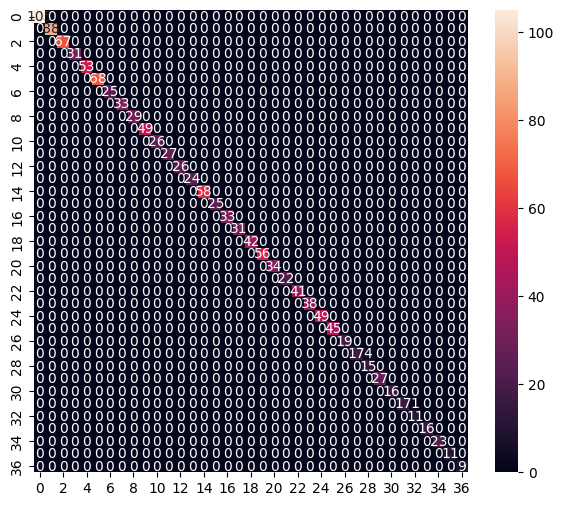

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        88
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        53
           5       1.00      1.00      1.00        68
           6       1.00      1.00      1.00        25
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        49
          10       1.00      1.00      1.00        26
          11       1.00      1.00      1.00        27
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        58
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        33
     

In [146]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [147]:
# Guardar como modelo de solo inferencia
model.save(model_save_path, include_optimizer=False)

c:\Users\selca\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3086: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [148]:
# Transformar (cuantizar) el modelo

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\selca\AppData\Local\Temp\tmpitlwaexi\assets


INFO:tensorflow:Assets written to: C:\Users\selca\AppData\Local\Temp\tmpitlwaexi\assets


8904

# prueba de razonamiento


In [149]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [150]:
# obtener tensor de entrada/salida

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [151]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [152]:
%%time
# Ejecución de inferencia

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [153]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.5582025e-06 3.1931184e-22 1.0093276e-09 6.7992877e-17 4.1954816e-22
 8.4166429e-19 2.7232118e-12 1.9807669e-06 5.7501722e-11 1.8853549e-14
 9.9845839e-01 8.1496646e-19 3.6904235e-10 4.2262462e-07 4.4789548e-08
 1.2986577e-16 1.5376504e-03 9.7988398e-28 3.0207927e-25 2.5474570e-10
 7.5617540e-24 4.6757126e-26 2.7302904e-30 3.0526749e-23 5.1487671e-16
 6.2282967e-24 1.2013093e-24 3.0022305e-16 7.1540189e-19 2.6982835e-17
 4.7797976e-15 5.5442908e-19 4.7754413e-15 1.4001152e-21 4.7380419e-23
 1.1184064e-18 7.5898597e-20 1.2386501e-22 2.8277835e-20 3.4844596e-21]
10
